In [1]:
!pip install squarify

In [2]:
# Dependencies
import numpy as np
import pandas as pd
import glob #this is used to concat the csv files
import pathlib   #this to join the path of the folder of csvs
import matplotlib
import matplotlib.pyplot as plt #Display the results on graphs
import seaborn as sns
import squarify # generate treemap
import os 

In [3]:
# setting the path for joining multiple files
#concatenate all files that start with Shooting

files = os.path.join(pathlib.Path().resolve(),"Datasets","Mass Shooting Data 18-22", "shootings*.csv")
#files = "C://Users//sodiq//OneDrive//Desktop//project1_Team3-main//Datasets//Mass Shooting Data 18-22//shootings*.csv"

# list of merged files returned
files = glob.glob(files)

# joining files with concat and read_csv
df_shootings = pd.concat(map(pd.read_csv, files), ignore_index=True)
df_shootings.head()

,Date,State,Dead,Injured,Total,Description
0,31/12/2018,Ohio,3,2,5,A dispute began at a rented Airbnb during a Ne...
1,29/12/2018,Ohio,1,3,4,One person was killed and three people were wo...
2,28/12/2018,Missouri,4,1,5,"A gunman shot and killed his girlfriend, her t..."
3,24/12/2018,Louisiana,2,2,4,Three people were killed and two others were w...
4,23/12/2018,Missouri,0,7,7,Seven people were wounded during a shooting at...


In [4]:
#Clean the dataframe
#Delete the column description [Not needed]
df_cleaned = df_shootings
df_cleaned.drop('Description',inplace = True, axis = 1) #if column ==> axis = 1, if rows ==> axis = 0
df_cleaned.head()

,Date,State,Dead,Injured,Total
0,31/12/2018,Ohio,3,2,5
1,29/12/2018,Ohio,1,3,4
2,28/12/2018,Missouri,4,1,5
3,24/12/2018,Louisiana,2,2,4
4,23/12/2018,Missouri,0,7,7


In [5]:
#Add a column for Year

df_cleaned['Date'] = df_cleaned['Date'].astype(str)
df_cleaned['Year'] = (df_cleaned['Date'].str[6:])
df_cleaned['Year'] = df_cleaned['Year'].astype(int)

#Display the result
df_cleaned.head()

,Date,State,Dead,Injured,Total,Year
0,31/12/2018,Ohio,3,2,5,2018
1,29/12/2018,Ohio,1,3,4,2018
2,28/12/2018,Missouri,4,1,5,2018
3,24/12/2018,Louisiana,2,2,4,2018
4,23/12/2018,Missouri,0,7,7,2018


In [6]:
#Group and aggregarte the statistics by state
#Rename columns by a significant names
df_agg = ( df_cleaned.groupby(by=['State'])
          .agg({'Dead':'sum','Injured' :'sum', 'Total':'sum'})
          .rename(columns={'Dead':'Total Dead','Injured':'Total Injured', 'Total':'Total Incident'})
          )

#Display the DF
df_agg.head()

,Total Dead,Total Injured,Total Incident
State,,,
Alabama,66,240,306
Alaska,6,12,18
Arizona,37,99,135
Arkansas,30,133,163
California,232,694,926


In [7]:
#Sort the data by the total incidents
df_agg.sort_values(by='Total Incident', ascending=True,inplace = True)
df_agg.head()

,Total Dead,Total Injured,Total Incident
State,,,
Wyoming,2,2,4
New Hampshire,0,4,4
Maine,3,1,4
Washington D.C.,1,4,5
Hawaii,4,4,8


In [8]:
#reset the index of the df
df_agg = df_agg.reset_index()

#get the top 10 worse 
df_agg_top_10 = df_agg.tail(10)

In [9]:
#Get the top 10 worse  States with higher (Deads, Injured and Incident)
df_states_top_10 = df_agg.tail(10)
df_states_top_10

,State,Total Dead,Total Injured,Total Incident
43,Missouri,72,287,359
44,Georgia,75,300,375
45,Ohio,87,366,453
46,New York,50,451,501
47,Pennsylvania,82,431,513
48,Louisiana,85,433,518
49,Florida,143,492,635
50,Texas,236,673,909
51,California,232,694,926
52,Illinois,164,1043,1207


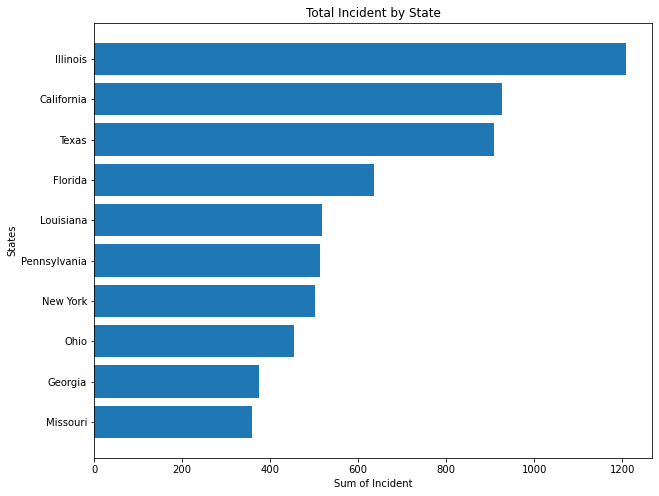

In [10]:
# Visualize the data
plt.figure(figsize = (10, 8))

# Set the axis values
x = df_states_top_10['State']
y = df_states_top_10['Total Incident']

#set the graph parameters
plt.title('Total Incident by State')
plt.ylabel('States')
plt.xlabel('Sum of Incident')
plt.barh(x,y)
plt.show()

In [11]:
plt.close()

In [12]:
# ATTENTION
print("Stay safe, Stay away from Illinois and California ")

Stay safe, Stay away from Illinois and California 


### Adding color-map

In [13]:
cmap = matplotlib.cm.Reds   #select cmap

#Normalize based on Volume
norm = matplotlib.colors.Normalize(vmin = df_states_top_10['Total Incident'].min(), vmax = df_states_top_10['Total Incident'].max())

#Define colors array
colors = [cmap(norm(i)) for i in df_states_top_10['Total Incident']]

<AxesSubplot:title={'center':'Total of Incidents by State'}>

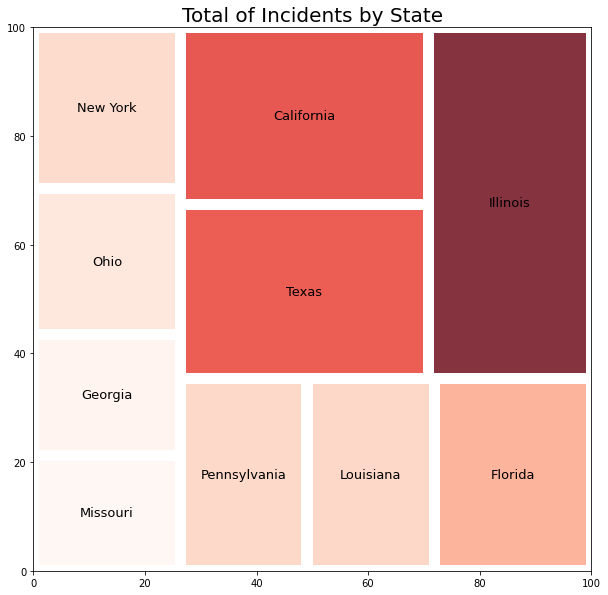

In [14]:
# Configure the figure size for a good vision
plt.figure(figsize = (10, 10))

# Set the title of the treemap
title = "Total of Incidents by State"
plt.title(title,size = 20)

# Draw the treemap
squarify.plot(df_states_top_10['Total Incident'], label = df_states_top_10.State, pad=True, text_kwargs = {'color':'black', 'size':13}, color = colors, alpha=0.8)